# Project - Credit Risk Analysis

Here we will build a classification model using Boosting Algorithm to  predict people eligible for Loan with given attributes with the help of a historical database of customers of a Bank who have already applied for a loan with same attributes. We will perform various Data preparation operations such as Data Cleaning, Dealing with Missing values, and visualization. We will try to build a model with a good accuracy. Lets go!

In [37]:
import pandas as pd

In [38]:
cr=pd.read_csv("CreditRisk.csv")

In [39]:
cr.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,981,957,978,956.000000,981,926,981.000000,981.000000,954.000000,961.000000,902.000000,981,981
unique,981,2,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002208,Male,Yes,NaN,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,775,631,NaN,763,807,NaN,NaN,NaN,NaN,NaN,349,712
mean,NaN,NaN,NaN,0.881799,NaN,NaN,5179.795107,1601.916330,142.511530,342.201873,0.835920,NaN,NaN
std,NaN,NaN,NaN,1.255623,NaN,NaN,5695.104533,2718.772806,77.421743,65.100602,0.370553,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,9.000000,6.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,2875.000000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,3800.000000,1110.000000,126.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,2.000000,NaN,NaN,5516.000000,2365.000000,162.000000,360.000000,1.000000,NaN,NaN


In [40]:
cr.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
976,LP002971,Male,Yes,4.0,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0.0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0.0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0.0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N
980,LP002989,Male,No,0.0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,Y


In [41]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [42]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

## Dealing with nulls :

In [43]:
cr.Credit_History=cr.Credit_History.fillna(0)
cr.Self_Employed=cr.Self_Employed.fillna("Yes")
cr.LoanAmount=cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Dependents=cr.Dependents.fillna(0)
cr.Gender=cr.Gender.fillna("Male")
cr.Loan_Amount_Term=cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Married=cr.Married.fillna("No")

In [44]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Making data numerical :

In [45]:
cr.Gender.replace({"Male":1,"Female":0},inplace=True)
cr.Married.replace({"No":0,"Yes":1},inplace=True)
cr.Education.replace({"Graduate":1,"Not Graduate":0},inplace=True)
cr.Self_Employed.replace({"No":0,"Yes":1},inplace=True)
cr.Property_Area.replace({"Semiurban":1,"Urban":2,"Rural":3},inplace=True)
cr.Loan_Status.replace({"Y":1,"N":0},inplace=True)

In [46]:
cr.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.00000,981.000000,981.000000,981.000000,981.000000
mean,0.814475,0.643221,0.859327,0.777778,0.177370,5179.795107,1601.916330,142.51153,342.201873,0.768603,1.939857,0.725790
std,0.388921,0.479293,1.247278,0.415952,0.382176,5695.104533,2718.772806,76.34777,64.432886,0.421940,0.805245,0.446343
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,6.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2875.000000,0.000000,101.00000,360.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3800.000000,1110.000000,128.00000,360.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5516.000000,2365.000000,160.00000,360.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,4.000000,1.000000,1.000000,81000.000000,41667.000000,700.00000,480.000000,1.000000,3.000000,1.000000


## Spliting the data for training and testing

In [47]:
cr_x=cr.iloc[:,1:12]
cr_y=cr.iloc[:,-1]

In [48]:
cr_x.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,1,0,5849,0.0,142.51153,360.0,1.0,2
1,1,1,1.0,1,0,4583,1508.0,128.00000,360.0,1.0,3
2,1,1,0.0,1,1,3000,0.0,66.00000,360.0,1.0,2
3,1,1,0.0,0,0,2583,2358.0,120.00000,360.0,1.0,2
4,1,0,0.0,1,0,6000,0.0,141.00000,360.0,1.0,2


In [49]:
cr_y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [50]:
import sklearn 
from sklearn.model_selection import train_test_split

In [51]:
cr_x_train,cr_x_test,cr_y_train,cr_y_test=train_test_split(cr_x,cr_y,test_size=.2,random_state=101) #randomState=set.seed

In [52]:
cr_x_train.shape

(784, 11)

In [53]:
cr_y_train.shape

(784,)

In [54]:
cr_y_test.shape

(197,)

Here we will use Adaptive Boosting Technique.

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
adp=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=15)

In [56]:
adp.fit(cr_x_train,cr_y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

In [73]:
cr_pred=adp.predict(cr_x_test)

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
tab1=confusion_matrix(cr_pred,cr_y_test)

In [76]:
tab1

array([[ 31,  28],
       [ 26, 112]], dtype=int64)

In [77]:
tab1.diagonal().sum()/tab1.sum()*100

72.58883248730965

Accuracy is around 72%

In [86]:
cr_pred_prob=adp.predict_proba(cr_x_test)
cr_pred_prob

array([[2.22044605e-16, 1.00000000e+00],
       [2.22044605e-16, 1.00000000e+00],
       [1.00000000e+00, 2.22044605e-16],
       [2.22044605e-16, 1.00000000e+00],
       [1.00000000e+00, 2.22044605e-16],
       [2.22044605e-16, 1.00000000e+00],
       [2.22044605e-16, 1.00000000e+00],
       [1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       [2.22044605e-16, 1.00000000e+00],
       [2.22044605e-16, 1.00000000e+00],
       [2.22044605e-16, 1.00000000e+00],
       [2.22044605e-16, 1.00000000e+00],
       [2.22044605e-16, 1.00000000e+00],
       [1.00000000e+00, 2.22044605e-16],
       [2.22044605e-16, 1.00000000e+00],
       [2.22044605e-16, 1.00000000e+00],
       [1.00000000e+00, 2.22044605e-16],
       [2.22044605e-16, 1.00000000e+00],
       [2.22044605e-16, 1.00000000e+00],
       [2.22044605e-16, 1.00000000e+00],
       [2.220446

In [87]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Now we will check the roc score and will plot the roc curve!

In [88]:
log_roc_auc=roc_auc_score(cr_y_test,cr_pred)
log_roc_auc

0.6719298245614036

In [89]:
cr_pred_prob=pd.DataFrame(cr_pred_prob) # Converting (Prediction in probs) to a dataframe

In [90]:
cr_pred_prob=cr_pred_prob.iloc[:,1] #In cr_pred_prob DF, both class 0 and class 1 prob was present hence only selecting second-
                                      #- column where only class 1 prob is present             

In [91]:
fpr,tpr,threshold=roc_curve(cr_y_test,cr_pred_prob)

In [92]:
tpr

array([0. , 0.8, 1. ])

In [93]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'AUROC CURVE')

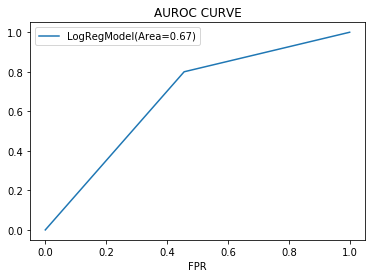

In [94]:
plt.plot(fpr,tpr,label="LogRegModel(Area=%.2f)"%log_roc_auc)
plt.xlabel('FPR')
plt.ylabel=('TPR')
plt.legend(loc="upper left")
plt.title("AUROC CURVE")